In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [2]:
#加载波士顿房价的数据集
data = load_boston()
data_pd = pd.DataFrame(data.data,columns=data.feature_names)
data_pd['price'] = data.target

In [3]:
# 查看数据类型
data_pd.dtypes.value_counts()

float64    14
dtype: int64

In [4]:
# 查看空值
data_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [5]:
# 查看数据大小
data_pd.shape

(506, 14)

In [6]:
# 查看数据描述
data_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# 显示数据前5行
data_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#计算每一个特征和price的相关系数
data_pd.corr()['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

<AxesSubplot:>

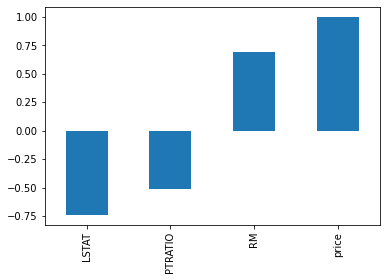

In [9]:
#将相关系数大于0.5的特征画图显示出来：
corr = data_pd.corr()
corr = corr['price']
corr[abs(corr)>0.5].sort_values().plot.bar()

In [10]:
#可以看出LSTAT、PTRATIO、RM三个特征的相关系数大于0.5，下面画出三个特征关于price的散点图。

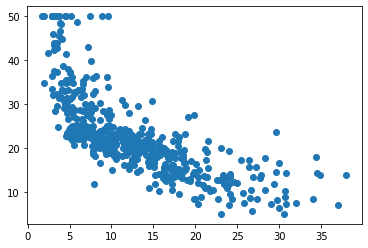

In [11]:
#LSTAT和price的散点图
plt.scatter(data_pd['LSTAT'],data_pd['price'])

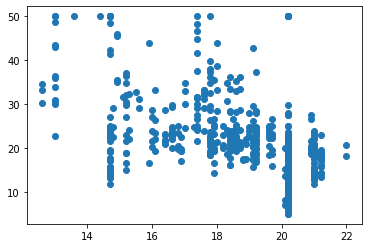

In [12]:
#PTRATIO和price的散点图
plt.scatter(data_pd['PTRATIO'],data_pd['price'])

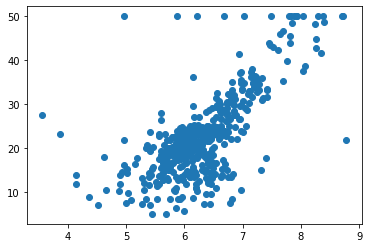

In [13]:
#RM和price的散点图
plt.scatter(data_pd['RM'],data_pd['price'])

In [14]:
#建立模型

In [15]:
# 制作训练集和测试集的数据
data_pd = data_pd[['LSTAT','PTRATIO','RM','price']]
y = np.array(data_pd['price'])
data_pd=data_pd.drop(['price'],axis=1)
X = np.array(data_pd)

In [16]:
# 分割训练集和测试集
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)

In [17]:
# 加载模型
linreg = LinearRegression()
# 拟合数据
linreg.fit(train_X,train_Y)

LinearRegression()

In [18]:
# 进行预测
y_predict = linreg.predict(test_X)

18.541143371703537

In [19]:
test_Y

array([18.7, 19.1, 22. , 26.7, 21. , 20.3, 22.4, 11.7, 28. , 20.2, 33.2,
       22.2,  9.6, 20.6, 21.9, 19.1, 36.2, 18.5, 18.9, 12.6, 29.4, 16.6,
       12.7, 28.5, 23.8, 10.4,  7.4, 28.7, 18.4, 10.2, 19.9, 19.6,  7.2,
       19.6, 16.2, 13.8, 15.2, 34.7, 13.3, 16.5, 17.1, 22.8, 21.1, 42.8,
       19.3, 34.9, 24.1, 22.8, 24.8, 16.7, 10.5, 12.7,  8.3, 18.8, 16.8,
       21.7, 50. , 24.4, 25.2, 31.5, 21.7, 22.6, 18.6,  7.2, 24.3, 20.1,
       17.1, 23.1, 24.7, 50. , 17. , 23.1, 13.4, 23.3, 50. , 23.2, 24.4,
       23.7, 18.4, 14.1, 19.4, 45.4, 27.1, 19. , 32.2, 17.5, 44.8, 21.5,
       22.6, 19.4, 23.2, 24.6, 17.4, 24.4, 19.4, 24.7, 18.3, 11.8, 23.2,
       13.6, 25. , 20.8])

In [20]:
y_predict

array([19.79746707, 18.97538155, 27.59392524, 28.08703345, 22.4833993 ,
       22.995041  , 23.38437464, 19.24975338, 28.34736744, 23.40851215,
       31.38502121, 24.42855138, 18.57971451, 22.21197462, 27.38351444,
       16.32750903, 24.55490622, 19.77087785, 17.33831752, 18.67173753,
       29.74517815, 18.43480745, 17.22528169, 29.88445595, 27.09450895,
        8.70385935,  4.26973398, 27.44199223, 21.11926807, 15.38090216,
       20.00970918, 20.56334249, 11.92725795, 22.02762227, 15.02322545,
        2.22923957, 14.51442364, 32.06769408, 13.74993534, 12.61050101,
       17.47892851, 25.88862616, 22.80281803, 35.61078144, 22.10884411,
       32.17172969, 28.25073363, 28.95610936, 32.26999483, 18.29986107,
       13.51573842, 12.06918511, 12.4813503 , 19.58313772, 17.89599213,
       21.1501875 , 38.95719087, 26.90532317, 25.92872677, 32.72558021,
       25.05927312, 27.4012581 , 22.1291055 , 16.74359425, 22.93621921,
       17.45376078, 19.70526215, 20.16554752, 25.93594416, 38.61

In [21]:
# 计算均方差
metrics.mean_squared_error(y_predict,test_Y)

18.541143371703537